# Introduction to Time Series: Fourier Analysis I 



Bryan Scott, CIERA/Northwestern

version 0.1, February 2024

Presented at LSST Discovery Alliance Data Science Fellowship Program Session 20: Time Series

### Goals for the Lecture

Understanding time series and their generalizations are the at the core of many fields of astronomy. A primary goal - perhaps *the* primary goal - of LSST is to observe the time varying sky. 

While people studying variable sources or transients will be most familiar with them on an 'everyday' basis, the same underlying approaches also apply to everything from simulating the interiors of stars to large scale structure cosmology. Careful analysis of time series have also enabled an entirely new window on the universe - gravitational wave detectors. 

The roots of time series methods are found in the development of the Fourier transform, which will be the subject of this lecture and where we start the week. Our goal in the first lecture is to understand how to construct Fourier series representations of repeating signals. We will then move to the continuum limit and generalize to non-repeating signals and generalized stochastic processes. 

### Pedagogical Framework

The field of Fourier Analysis is vast and the core of many fields, everything from electrical engineering, to numerical fluid dynamics, to much of astronomy. It's also a (relatively) old field (Fourier was born in 1768). Organizing just the basics is a challenging task and much of the methods and jargon is culturally transmitted wisdom in specific subfields. 

My strategy is to break the topic down into a rough narrative. 

I'll start with the Fourier Series representation of periodic functions and generalize this to the Fourier Transform. 

We'll then discuss how the Fourier transform is used in practice to characterize time series in 1-dimension and wrap up lecture I by looking at Fourier transforms in dimensions greater than 1. 

In lecture II, I'll introduce (arguably) the most important practical result in Fourier analysis - the convolution theorem - and introduce some applications to example time series. 

From there, I'll conclude the core introduction to the topic with results related to sampling and reconstruction of continuous signals from discretely sampled ('real') data. Finally, I'll introduce wavelets, an additional generalization of Fourier analysis, that has been explored in the recent literature as a possible improvement on standard techniques for the analysis of survey data. I'll then conclude with a brief comment on fully general perspectives that connect Fourier theory with the architecture of neural networks. 

### Further Resources

As the core tool of many fields, you can imagine that there are a vast number of resources of Fourier Analysis.  Some resources I have found useful in preparing this lecture: 

The Fourier Transform and its Applications, by Osgood (*the* definitive treatment according to many Electrical Engineers, how I learned the subject, and the major basis for this lecture) 

Statistics, Data Mining, and Machine Learning in Astronomy, by Ivezić, Connolly, VanderPlas, and Gray (go-to for everything survey astronomy)

Statistical Physics for Cosmic Structures, by Andrea Gabrielli, Luciano Pietronero, and Michael Joyce (a bit out of date, but a fantastic resource for understanding the formalism as applied in Cosmology)

## Q: What are Time Series Methods for? A: Representing [Perioidic] Signals

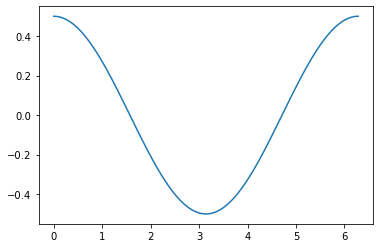

In [3]:
plt.plot(t, y1)

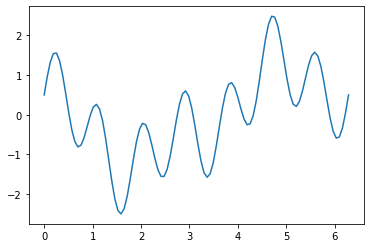

In [4]:
plt.plot(t, y2)

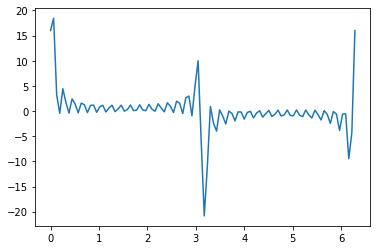

In [5]:
plt.plot(t, y3)

Given a signal like the ones we've just seen, what are some things we might like to do? Presumably at least two things,

1. Characterize correlations 
2. Predict, or in the time series jargon *forecast* future values 

Since characterizing correlations is a more common task in Astronomy, we will focus this week almost exclusively on that task. You should be aware that time series forecasting is a more common task in industry (for what are probably obvious reasons) and that much of the time series literature is about forecasting rather than signal characterization. 

(As an example of forecasting task in astronomy - predict the timing of a transit of one of Jupiter's moons accounting for perturbations on the orbits due to tidal evolution). 

Much of the literature on signal characterization focuses on the Fourier Series representation of a periodic discrete signals. Knowing that many of us have at least *seen* Fourier Series before, I'll remind you of the exact definitions in a minute. What I want to start with is a high level view (following Osgood here) of what matters to arrive at the notion of a Fourier Series: 

## What even is a (periodic) time series?

Time series methods concern measurements of a system at intervals in time. That is, we have functions or mappings of the form,

$$
w(t) = L(v(t))
$$

where w(t) is the time series, L is some system that operates on some space of inputs v(t). If there exists a T, called a period, such that:

$$
w(t + T) = w(t)
$$

we call the time series periodic. 

Different applications will require us to put requirements on the nature of w(t), L, and v(t). This general framework for thinking about signals applies to whatever systems we might be studying, whether astronomical time series, the behavior of some complex piece of machinary, or even multi-dimensional systems, like images or video. In general, we will only study linear and homogenous signals:

$$
L(v_1(t) + v_2(t)) = L(v_1(t)) + L(v_2(t)) \\
L(\alpha v(t)) = \alpha L (v(t))
$$

The so-called 'principle of superposition'. 

## Some (possibly nontrivial) observations:

1) $\sin(t)$, $\cos(t)$ are periodic functions

2) A special class of functions is picked out by the condition that:

$$  
\left| \int_{-\infty}^{\infty} e^{-2 \pi i k t} f(t) dt \right| \le \int_0^1 |f(t)| dt < \infty
$$ 

This might look like a strange construction, but we'll get back to the origin of the left hand side of this expression. For the moment, functions that satisfy this expression will be close to the class of functions we're interested in. This condition, called $L^1$ integrability, gurantees existence and continuity of the Fourier Transform (introduced shortly). Unfortunately, this criteria is actually too restrictive to be always useful. More on this in the second lecture. 

3) The complex exponentials have orthogonal dot products. 

The relevance of observation 1) to modeling periodic signals should be clear since a combination of periodic signals is periodic (under certain general conditions). This suggests an obvious path forward. Represent periodic signals f(t) by combinations of sin(t) and cos(t). 

2) and 3) should be suggestive. 2) suggests that we will seek to represent functions of time by approximate representations in a least squares sense. This is what is meant by the word *analysis* - we seek limits in which a series of periodic functions represents a different periodic function. 3) suggests that we will do this by generalizing our intuition for basis vectors in a Euclidean plane to the space of functions f(t). 

The above is all that is needed to motivate the following definitions of the Fourier Series representation: 

$$
F(x) = a_0 + \Sigma_{n=1}^{\infty} a_n sin(n \omega t) +  \Sigma_{n=1}^{\infty} b_n cos(n \omega t)
$$

$$
a_n = \frac{2?}{T} \int_0^{T} f(t) sin (n \omega t) dt
$$

$$
b_n = \frac{2?}{T} \int_0^{T} f(t) cos (n \omega t) dt
$$

these are just dot products onto the basis of trigonometric functions. Performing this operation is just generalizing our notion of dot products on Euclidean vector spaces to the space of functions.

## Part II: Does this actually work? The Triangle Wave Example

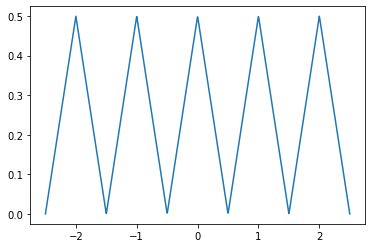

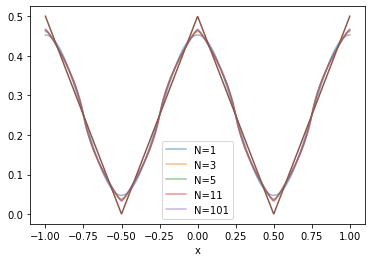

## III: From Fourier Series to Fourier Transforms

So far, we have considered only strictly periodic functions. We want to also be able to characterize functions that aren't strictly periodic. The basic idea is to approximate a non-periodic function as a periodic function in the limit where the period T $\rightarrow \infty$. What happens in this case? An exercise will ask you to make and interpret the following plots of fourier transforms of the rectangle function, but let's pause to reflect on the generic behavior.  

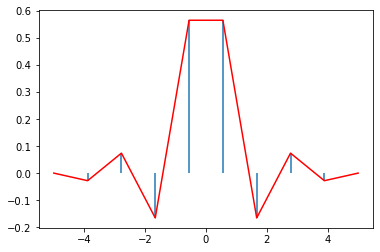

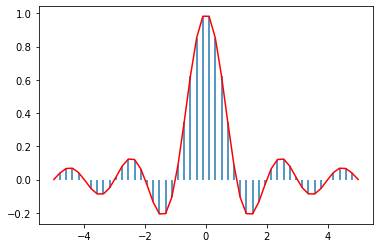

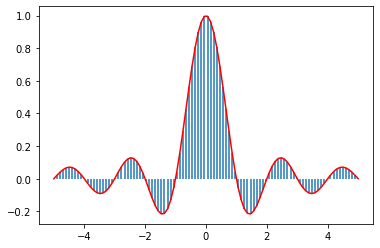

As you can see, as the period of the signal increases, the constituent frequencies become more localized and seem to be bounded by some function. Can we derive an expression for this bounding function? 

Obviously, since we're asking the question, the answer will be yes - we will give it the name "Fourier Transform of f(t)". 

The domain on which the Fourier transform is defined is the space of functions. Fourier Transforms are operators on function spaces and not on the domain of the function itself. This is confusing because we will also talk about the domain on which the functions f(t) and the fourier transform $\tilde{f}$ are defined as the 'time domain' and the 'frequency domain'. The Fourier Transform is an operator that takes functions which live on the time domain and converts them into functions that live on the frequency domain. 

The advantage to this (as we'll see shortly) is that this operation amounts to a diagonalization. We can use the independence of frequency components for $\tilde{f}$ to perform operations that are difficult or impossible in the time domain. We can then perform the inverse operation to take a function in the frequency domain and return it to the time domain. 

I'll skip the details for now (see the problems for this lecture), but conceptually...

We arrive at the definition of the Fourier Transform: 

$$
\tilde{f}(k) = \int_{-\infty}^{\infty} e^{-2 i \pi k t} f(t) dt
$$

and the inverse Fourier Transform:

$$
f(t) = \int_{-\infty}^{\infty} e^{2 i \pi k t} \tilde{f}(k) dk
$$

An exercise will ask you to derive the bounding function for the rect function using these expressions. You should see that the limiting function we found visually is given by the Fourier Transform. Before we move on, a note on Fourier conventions: 

## IV: Important Properties of the Fourier Transform and The Power Spectrum

Let's focus on the Power Spectrum and the Power Spectral Density 

Some important properties of the Fourier Transform are:

1. If f is a real valued and even function, then it's transform is real and even. If f is a real valued and odd function, then it's transform is odd and purely imaginary. 

2. The Fourier transform is a *linear operation* $\mathscr{F}$(f + g)(k) = $\mathscr{F}$f(k) + $\mathscr{F}$g(k) and $\mathscr{F}$($\alpha$f)(k) =$\alpha$$\mathscr{F}$f(k). This follows from basic manipulations of the definitions above. 

3. Shift Theorem: A delay in the time domain corresponds to a phase shift in the frequency domain, but not a change in amplitude. In other words,

$$
f(t+b) \leftrightarrow e^{\pm 2 \pi k b} \mathscr{F}(k)
$$

4. Stretch/Similarity Theorem: What if we multiply the time coordinate? Frequencies are rescaled by a factor 1/a and we pick up a normalization.

$$
f(a t) \leftrightarrow \frac{1}{|a|} \mathscr{F}(\frac{k}{a})
$$

We will study this more in the context of the PSD in a problem later today.

The square magnitude of the Fourier Transform is called the *power spectrum*, the *power spectral density (PSD)*, or the *energy spectrum*. An important result, called Parseval's theorem, relates the square magnitude of the signals in the time domain and the frequency domain (power spectrum)

$$
\int_{-\infty}^{\infty} |f(t)|^2 dt = \int_{-\infty}^{\infty} |\tilde{f}(k)|^2 dk
$$

The units of the power spectrum are $amplitude^2/frequency$. 

## V: Fourier Transforms in d-dimensions, Window functions, and Application to Scale Dependent Variance Estimates

While the main goal for this week is to characterize signals X(t) with different methods, many of the techniques we are studying are fully general to any stochastic field of arbitrary dimensionality. For example, the Fourier transform in d > 1 for arbitrary function f($\vec{r})$ in a (possibly infinite) volume V can be written

$$
\tilde{f}(\vec{k}) = \int_V d^d r f(\vec{r}) e^{-i \vec{k} \cdot \vec{r}}
$$

An application for d > 1 Fourier transforms is the study of the 3D distribution of matter. If the matter distribution is written in terms of the density contrast between the density $\rho(r)$ and the mean density $\rho_0$, then the Fourier transform of the density contrast field is

$$
\tilde{\rho}(\vec{k}; V) = \int_V d^d r \vec{\rho}(r) e^{-i \vec{k} \cdot \vec{r}}
$$

and the Power Spectrum (up to a factor of $V^{-1}$ of the density field is just the square of this quantity:

$$
P(\vec{k}) = \frac{\left< \left|\tilde{\rho}(\vec{k}; V)\right|^2\right>}{V}
$$

where $\left< \right>$ indicates ensemble averaging over many realizations. Under the assumption that averaging over an infinite volume can approximate averaging over an ensemble, we need to take the $\lim_{V \rightarrow \infty}$ of P(k). 

As a reminder, what P(k) tells you is the net contribution of the mode $\vec{k}$ to the stochastic process, whether that's a time series y(t) or a stochastic density field $\rho(\vec{r})$. 

One final detail - the Fourier Transform of the Power Spectrum yields $\xi(\vec{r})$, the *correlation function*. One can work in either the Power Spectrum (frequency domain) or the Correlation Function (time domain) and obtain equivalent results. It is often easier to work in one or the other depending on the exact problem you're trying to solve. Note that the expressions here are not dimensionless but can be made so (as is often the convention) by dividing by $\rho_0$ or $\rho_0^2$.

What if we want to measure the variance of some signal in some volume of size V and shape $\mathscr{V}$ (for example, the mass density in the LSST survey volme)? We introduce a window function:

$W_{\mathscr{V}}(r) = 1$ if $r \in \mathscr{V}$

$ W_{\mathscr{V}}(r) = 0 $ otherwise

then:

$$
\sigma^2 (\mathscr{V}) = \frac{1}{(2\pi)^d} \int d^dk P(\vec{k}) \left| \tilde{W}_{\mathscr{V}} (\vec{k}) \right|^2
$$

which says that the variance is the integral of the product of the Fourier transform of the correlation function and the Fourier transform of the window function squared. The behavior of the variance across a range of scales can be used to classify whether a given stochastic process is homogeneous. 

We will see examples of expressions like this when we introduce the convolution operation in the afternoon.

## Problem Set I: 

The problem set has the following problems: 

1. Fourier Series for Discontinuous Functions 
2. Fourier Transforms for Periodic and Aperiodic signals 
3. Fourier Transforms as Limiting or Bounding Functions
4. Application to Kepler Lightcurve Data 

## VI: Appendix (Preview of Session 21): The Discrete Fourier Transform and the FFT Algorithm

I want to end this lecture by mentioning something that may seem obvious in retrospect. Real data and our analysis must be done on computers that can only approximate continuous variables and continuous operations. As such, we will use Discrete Fourier Transforms, mostly implemented using the Fast Fourier Transform algorithm, as a stand in for the exact integrals over continuous signals that we have (mostly) discussed so far. The discrete fourier transform is given by:

$$
H_k = \Sigma_{}^{} h_j e^{-2 \pi i j k/N} 
$$

and the inverse operation is defined similarly, 

$$
h_j = \Sigma_{}^{} H_k e^{2 \pi i j k/N} 
$$

The discrete Fourier transform returns a complex vector of length N Fourier coefficients. We can describe the signal as a discrete sum of sinusoids. 

To implement your own DFT using the Fast Fourier Transform algorithm requires some software techniques that we will cover in Session 21. We will therefore cover it then. 

However, if you have done an analysis invovled DFTs in the past, you may have noticed some possibly mysterious behavior in the outputs. This can be summarized by the following properties: 

1. If N is odd, the first (N-1)/2 terms contain the positive frequencies while the second (N-1)/2 terms contain the "negative" frequencies. 
2. If N is even, the first N/2 - 1 terms contain the positive frequencies, while the second N/2 - 1 terms contain the "negative" frequencies
3. For real valued inputs, the DFT is symmetric, so the terms corresponding to 'negative frequencies' contains only redundant information that can be discarded. 
4. The amplitude and phase are given by:

$$

$$

5. Note that these expressions depend on the number of sample points, which will differ between real and complex signals (either N, or N/2) based on the symmetries of the DFT. 

# Lecture II: Fourier Analysis Continued

Bryan Scott, CIERA/Northwestern

version 0.1, February 2024

Presented at LSST Discovery Alliance Data Science Fellowship Program Session 20: Time Series

### Goals for the Lecture and Pedagogical Strategy

This lecture extends the concepts of the Fourier Series and Fourier Transform that we saw in the previous lecture. 

So far, we have considered only the case where we have a single signal that we wish to characterize, and we have not consider common cases, such as in astronomy, where there are multiple interacting signals. Ideally, we should be able to use the tools we've developed for the case of a single signal to this more realistic setting. 

We will begin our study of interacting signals by defining a new operation - called convolution - and study its behavior in the time and frequency domains. We will then introduce the concept of 'filtering' a signal and use our filtering perspective to understand how continuous signals are discretely sampled by real observations. 

We will then introduce some advanced concepts, including a generalization of the Fourier analysis to the wavelet basis and lastly, we will touch on the generalization of Fourier Analysis to the study of finite groups, a perspective that underpins much of the modern machine learning literature. 

### Further Resources

As the core tool of many fields, you can imagine that there are a vast number of resources of Fourier Analysis. Some resources I have found useful in preparing this lecture: 

The Fourier Transform and its Applications, by Osgood (*the* definitive treatment according to many Electrical Engineers) 

Statistics, Data Mining, and Machine Learning in Astronomy, by Ivezić, Connolly, VanderPlas, and Gray

Statistical Physics for Cosmic Structures, by Andrea Gabrielli, Luciano Pietronero, and Michael Joyce (a bit out of date, but a fantastic resource for understanding the formalism as applied in Cosmology)

## VII: The Convolution Theorem 
   
As a review of what we learned this morning, there are functions of time f(t) that we call signals, which we can characterize through their power spectrum or power spectral density P(k). f(t) and P(k) are related by an operation called the Fourier transform, which takes functions defined in time and turns them into functions defined in frequency. 

The Fourier transform is an additive operation, what that means is that if I had two signals f, g, both defined on the time domain and I wanted to take the fourier transform of their sum,

$$
\mathscr{F}(f+g) = \mathscr{F}f + \mathscr{F}g
$$

I just sum the Fourier transforms. Put another way, adding the signals f(t) and g(t) just sums the amounts Fg(s) to Ff(s) in the frequency domain. 

We can do something similar for products. If I multiply a signal in the time domain f $\rightarrow$ $\alpha$ f, what happens in Frequency?

$$
\mathscr{F}(\alpha f)(s) = \alpha \mathscr{F} f(s)
$$

(this is what the volume slider does - it scales all frequencies up or down simultaneously)

What if we wanted to only change some frequencies but not others? The operation that will accomplish this is called a convolution. Convolution will allow us to perform all sorts of important operations on time series, like *filtering*, *sampling*, and *interpolating*. 

What we want is a function that takes signals in the time domain f(t) and g(t) and produces a combination which corresponds to the product of their Fourier transforms, in other words, what operation does the following:

$$
\mathscr{F}(\mathscr{O}(f(t), g(t))) = \mathscr{F}g(s)\mathscr{F}f(s)
$$

?

This question may sound difficult to answer, but it actually follows directly from manipulating the right hand side. Just write down the the Fourier transforms of f(t) and g(t), take their product, make a change of variables u = t + x (relabeling one argument of f,g), switch around some orders of integration, and you'll get the following result: 

$$
h(t) = (g * f)(t) = \int^{\infty}_{-\infty} g(t-x) f(x) dx 
$$

with

$$
\mathscr{F}h(s) = \mathscr{F}g(s)\mathscr{F}f(s)
$$

You'll recognize the first expression as the convolution integral, and the second result is called the convolution theorem. Convolution in the time domain corresponds to multiplication in the frequency domain. 

What is convolution?

In [30]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.earthinversion.com/ezoimgfmt/raw.githubusercontent.com/earthinversion/earthinversion-images/main/images/convolvesigs.png?ezimgfmt=rs:857x593/rscb30/ng:webp/ngcb30")

At a given value of t (g * f)(t) is a weighted average of values of f near t. If we allow t to vary, we're then smoothing the function f over the values of g(t-x). Values of the convolution integral are closer together than values of the function f(x). Osgood summarizes this as "the convolution g * f is at least as smooth a function as g and f are separately."

Be careful in how you think about convolution, it invovles an operation over all values of f(x) and g(x) and yields values of the function h(t). In this sense, the functions are 'smeared together' by the smoothing and averaging. 

Useful Convolution Properties: 
- 

## VIII: Filtering 
    
Filtering is an operation to modify the spectral content of an input signal. Filtering arises either to achieve some analysis aim - maybe we want to examine or retain only one set of frequencies present in a signal - or arises as a way to understand the behavior of some periodic physical system.

For example, the behavior of the spin-orbit coupling of the Galilean satellites is described by a sharply peaked function in the frequency domain. Perturbations to the orbit close to the 'free response' frequency of rotation are strongly enhanced (see Bills & Scott, 2022). 

As we just saw, the operation that corresponds to frequency domain multiplication is convolution in the time domain. We can therefore understand filtering as an application of convolution. In the frequency domain, we have:

$$
W(s) = H(s) V(s)
$$ 

where W(s) is the filtered signal, H(s) is the frequency domain filter, and V(s) is the input signal in the Fourier domain. 

The appropriate procedure for filtering is to take a time domain signal v(t), perform the Fourier transform to obtain V(s), multiply by a filter in the frequency domain to obtain the filtered signal W(s), and then frouier transform back to the time domain to obtain the filtered series in the time domain. 

Some properties of Filtering: 
- Filtering can't add frequencies to the spectrum that weren't present in the input time series. 
- It can remove frequencies however (anywhere H(s) is zero will be removed)
- It can change the amplitude of any existing frequencies
- Real valued filters don't change the phase of the input signal. Complex valued filters can change the phase.

High pass filters remove low frequencies (they pass high frequencies), while low pass frequencies remove high frequencies (they pass low frequencies). I always found this jargon a bit confusing. 

## IX: Discreteness: Dirac $\delta$s and Sampling 
### Dirac $\delta$s

    
We're about to look at one of the most commonly cited results in Fourier Analysis - Nyquist's sampling theorem. We'll get there by showing that a signal can be reconstructed from a discrete samples of a function, which will require us to make use of the Dirac $\delta$ "function". 

I put "function" in quotes becuase the Dirac $\delta$ is not a function.

We'll then make use of Dirac $\delta$s to define sampling, construct the interpolation theorem, and show explicitly why the Nyquist frequency gives an appropriate limit for sampling. 

We start by looking for a broader criteria for when a function has a well defined Fourier transform and, importantly, also an inverse operation. It turns out that the criteria mentioned in the morning lecture:

$$
\left| \int_{-\infty}^{\infty} e^{-2 \pi i k t} f(t) dt \right| \le \int_0^\infty |f(t)| dt < \infty
$$

which is the criteria for $L^1$ integrability of functions is too restrictive. While every function that meets this condition has a well defined Fourier transform, functions that are in $L^1$ sometimes have Fourier transforms that are not themselves in $L^1$, meaning that they do not have an inverse Fourier transform. 

In order to be able to do Fourier analysis on this wider class of functions, mathematicians instead consider the class of functions that is *smooth* and *rapidly decreasing*. These are called *Schwartz functions*. Schwartz functions have Fourier transforms which are Schwartz and hence have a well defined inverse (namely, the original function). 

An example of a Schwartz function is the Gaussian function (Gaussian *distribution*). 

This can be further generalized to the class of distributions, such as $\delta$ that are *linear functionals* that operate on Schwartz functions. 

All this means is that the action of a distribution on a Schwartz function returns a number. For example, the Dirac $\delta$ operating on a function returns the value of that function at a point. 

Hence, sampling.

For a given function f(x) such that the intergal $\int^{\infty}_{-\infty} f(x) \psi(x) dx$ exists, the *tempered distribution* $T_f(\varphi)$ corresponding to f(x) is given by

$$
\left< T_f, \varphi \right> = \int^{\infty}_{-\infty} f(x) \varphi(x) dx
$$

where $\varphi(x)$ is an arbitrary test function. In this way, the $\delta$ function is defined s.t. the outcome of this operation is the value of the function $\varphi(x)$ at 0 (or suitably shifted for a shifted $\delta$). If this approach is confusing, there is also an approach based on limits of distribution functions, like a gaussian, that can also be used to recover the same results. The details are found in Osgood's notes, but I prefer the linear functional approach since it is more general. 

We have

$$ 
\left< \delta_a, \varphi \right> = \varphi(a)
$$

which defines the delta function at a. This basic action of the distribution on a test function should replace the more conceptually difficult definitions you might be more familiar with, like:

$$
\delta(x) = 0 \\
\delta(0) = \infty \\
\int_{-\infty}^{\infty} \delta(x) dx = 1
$$

there are other distributions and lots of mathematical formalism. As I've mentioned, there are other ways to define distributions and, hence, the kinds of functions that have Fourier transforms, but this approach is the clearest to me (apart from some more abstract notation, perhaps). 

What is the Fourier transform of the $\delta$ function? We can understood this in terms of equality of distributions, that is, two distributions are equivalent if the action of two distributions on test functions is the same. We have

$$
F \delta = 1
$$

because

$$
\left< F\delta, \varphi \right> = \left< \delta, F\varphi \right> = F \varphi(0) = \int^{\infty}_{-\infty} \varphi(x) dx = \left< 1, \varphi \right> 
$$

You should be able to use a similar argument to show that $F1 = \delta$. We can push through a similar argument to show that 

$$
F\delta_a = e^{-2 \pi i x a} \\
Fe^{2 \pi i x a} = \delta_a
$$

This is useful! 

## Sampling

One application of the $\delta$ function is to write down, in a general way, a method for writing (infinitely) periodic functions. We'll call the function that acts on another function to make it periodic $\zeta$, and we can define it as a sum of $\delta$ functions. 

$$
\zeta_p(x) = \Sigma_{-\infty}^{\infty} \delta(x - kp) 
$$

and its use as easily seen if we assume a function is periodic on some finite range.

$$
f(x + p) + f(x) + f(x-p) = f(x) * \Sigma^{k = 1}_{k = -1} \delta(x - kp) = f(x) * \zeta_p
$$

so convolving f(x) with $\zeta$ gives the periodization of f(x). 

What about multiplication of a function with $\zeta$?

$$
f(x) \zeta(x) =  \Sigma_{-\infty}^{\infty} \delta(x - kp) f(x) =  \Sigma_{-\infty}^{\infty} \delta(x - kp) f(kp)
$$

So multiplication samples the function f(x) at discrete values. A fun fact with deep consequences is that 

$$
F \zeta = \zeta
$$

$\zeta$ is its own Fourier transform. 

Believe it or not, this formalism now allows us to ask a deep question with important implications:

### Given a signal f(t) and a collection of samples of the signal, $f(t_0), f(t_1), f(t_2)$, can we express the values of f(t) as a function of the sample points?

Remarkably, the answer is yes. The proof is not complicated but requires the machinary we've developed so far. 

To prove it, do the following

1) apply $\zeta$ to the Fourier transform of f(t)

2) apply a function to 'cut off' the Fourier transform to a finite range called p. (make it a *band limited* signal, that is a signal describable with a finite number of frequencies)

3) take the inverse fourier transform

if you do this, you'll find that the final reuslt is 

$$
f(t) = \Sigma_{-\infty}^{\infty} f \left(\frac{k}{p}\right) sinc p\left(t-\frac{k}{p}\right) 
$$

so the value of the function can be expressed in terms of discrete sample points $\frac{k}{p}$. 

Is there some limit on the number of such discrete sample points that we need to describe a signal? 

Yes, and it has an important name - *the Nyquist Frequency*. 

If you notice, the interpolation formula depends on the bandwidth p - which is the finite range of the Fourier transform where there are non-zero frequencies. 

If the spectrum runs from frequency $\nu_{min}$ to $\nu_{max}$, we need to sample with a rate ($\tau$) at least twice the highest frequency,

$$
\tau \ge 2\nu_{max}
$$

this has an intuitive origin, if I describe a signal with a single sinusoid, I have

$$
f(t) \approx A_0 sin(\omega t + \phi)
$$

which has 3 unknowns. So I need at least 3 $\ge$ 2 equations, one for each parameter. If my signal is instead constrained by a *collection* of sinusoids, then I need at least three measurements of each sinusoid, which I can only get in a finite time span by measuring at least 3 of the highest frequency present. 

Any frequencies that I don't sample at the Nyquist rate will remain unresolved. This is called *aliasing*, where frequencies we are unable to resolve are translated into the range of frequencies we can. We'll explore this in the problem set. 

## IX: Advanced Topics: Wavelet Transforms and Generalized Fourier Analysis

I want to just mention a few generalizations of the ideas we've seen before. 

First, wavelets. The Fourier transform is an operation that converts localized signals in frequency to continuous signals in the time domain and localized signals in the time domain to continuous signals in the frequency domain. Can we construct an analogy to the FT that converts signals in the time (frequency) domain to signals that are localized in the time and frequency domain simultaneously? 

While the FT can't do this, the Wavelet transformation can. These are increasingly popular for applications in cosmology, and I'd be curious to hear of applications in other branches of astronomy. 

While I won't say a great deal about this, the basic idea is to construct such a function as a 'mother wavelet', which we then use to define a bank of wavelets from through scale and orientation shifts.

$$
\{\varphi_{j, \theta} \}\propto \mathscr{R_{\theta}} \times Z^{-j r} 
$$

which we combine with an input signal via convolution

$$
\{ x * \varphi_{j, \theta} \} 
$$

that is, we retain the information in the signal x that matches a certain scale and orientation. 

(I haven't given you a problem on this since a nice package for wavelet manipulations is not currently available on Apple Silicon - if you have an Intel based computer and want to explore this in the hack session, let's talk!) 

This is related to the idea of "matched filtering" which we will cover in the context of gravitational wave time series later in the week.

Wavelets are one way of generalizing Fourier Analysis. Another is to look at the symmetries corresponding to the Fourier basis. This will be very abstract, but I mostly want you to take away a general idea of how this might work.

Convolution somehow has something to do with shifts in one function g(t-x). We can suppose that there are matrices that define the space of shifts of a vector x left or right. These will correspond to discrete shift operator matrices. 

Without proving it, I will simply state that these matrices have the Fourier Basis as their eigenvectors, in other words,

$$
\varphi_k \propto \{1, e^{2 \pi i k/n}, e^{4 \pi i k/n}, ..., e^{(n-1) \pi i k/n}\}
$$

from which we construct an $n \times x$ matrix, where the $\varphi_k$ are the columns. Call this diagonalized shift operator $\Phi$. Then we can define convolution as

$$
C(\theta) x = \Phi   \begin{bmatrix}
    \hat{\theta}_1 & & \\
    & \ddots & \\
    & & \hat{\theta}_k
  \end{bmatrix} \Phi^* x 
$$

where $\hat{\theta}$ are the corresponding eigenvalues for the eigenvectors in the columns of $\Phi$, which allows us to define an analogy of convolution with different "Fourier bases" for any given group of operators. 

This provides a modern perspective for the study of the theory of *convolutional* neural networks in terms of generalized Fourier analysis. 

### It all comes full circle.

## Problem Set II:

The Problem set has the following problems:
    
1. Low Pass Filtering
2. Optimal/Wiener Filtering
3. Intution for Sampling and Aliasing 
4. Challenge Problem: Gaussian Random Fields 